In [2]:
#importig required libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#reading the data using pandas
course_data=pd.read_csv("course_information.csv")
course_threads=pd.read_csv("course_threads.csv")
course_posts=pd.read_csv("course_posts.csv")
sort = course_data.sort_values(by = 'num_threads' , ascending = False)


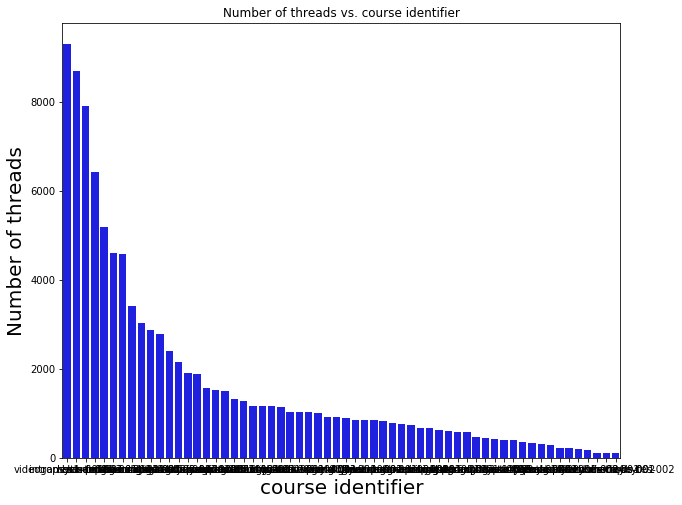

In [4]:
#generating plot using seaborn
plt.figure(figsize=(10,8))
sns.barplot(data = sort, x = 'course_id' , y = 'num_threads' , color = 'blue')
plt.title('Number of threads vs. course identifier')
plt.ylabel('Number of threads', fontsize=20)
plt.xlabel('course identifier', fontsize=20)
plt.show()

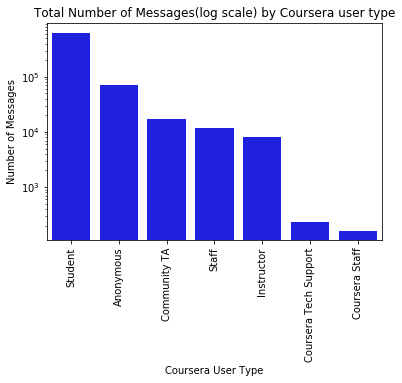

In [6]:
#Figure 2
#using gorupby to create another dataframe with user_type and post id
course_posts_1 = course_posts.groupby('user_type')['post_id'].count().reset_index()
course_posts_1.sort_values('post_id', ascending = False, inplace= True)

sns.barplot(data = course_posts_1, x = 'user_type', y = 'post_id', color = 'blue')
plt.xlabel("Coursera User Type")
plt.ylabel("Number of Messages")

#adding log scale to numnber of messages
plt.yscale('log');
plt.xticks(rotation = 90, horizontalalignment = "center");
plt.title("Total Number of Messages(log scale) by Coursera user type")
plt.show()

In [8]:
course_posts.head(5)

,post_id,thread_id,course_id,parent_id,order,user_id,user_type,post_time,relative_t,votes,num_words,forum_id
0,3,2,analysenumerique-001,0,1,0,Anonymous,1358942448,-0.404753,2,23,13
1,4,2,analysenumerique-001,0,2,3992067770,Instructor,1359109877,-0.373994,0,15,13
2,7,2,analysenumerique-001,0,3,3992067770,Instructor,1359129778,-0.370338,1,9,13
3,8,2,analysenumerique-001,0,4,0,Anonymous,1359130161,-0.370267,0,2,13
4,15,2,analysenumerique-001,0,5,3992067770,Instructor,1359214077,-0.354851,0,31,13


In [10]:
#figure 3
course_posts['is_post'] = course_posts.parent_id==0 #checking for posts in parent_id
course_posts['is_post'] 

0          True
1          True
2          True
3          True
4          True
          ...  
739069    False
739070    False
739071    False
739072     True
739073     True
Name: is_post, Length: 739074, dtype: bool

In [11]:
#Grouping the variables using groupby.count
tmp = course_posts.groupby(['course_id', 'thread_id', 'is_post']).count()[['post_id']].reset_index() 
tmp
tmp['count'] = tmp['post_id'] # replacing the column post_id with count
tmp.drop('post_id', axis=1, inplace=True)
tmp.head()

#generating a new column with the name num_posts and assigning it value as 0.
#checking if is_post is true or false.
tmp['num_posts'] = 0
tmp['num_comments'] = 0
tmp.loc[tmp.is_post == True, 'num_posts'] = tmp['count']
tmp.loc[tmp.is_post==False, 'num_comments'] = tmp['count']
tmp.head()
tmp = tmp.groupby(['course_id', 'thread_id']).max().reset_index()
tmp.head()


,course_id,thread_id,is_post,count,num_posts,num_comments
0,analysenumerique-001,2,True,9,9,2
1,analysenumerique-001,3,True,16,16,3
2,analysenumerique-001,4,True,2,2,0
3,analysenumerique-001,7,True,3,3,0
4,analysenumerique-001,8,True,8,8,1


In [13]:
fig4_dat = course_threads.query("forum_id == 4|forum_id==3").merge(tmp, on=['course_id', 'thread_id'])
fig4_dat.head(2)
fig4_dat = fig4_dat[['forum_id', 'num_posts', 'num_comments']]
fig4_dat.head(2)


,forum_id,num_posts,num_comments
0,3,5,0
1,3,4,0


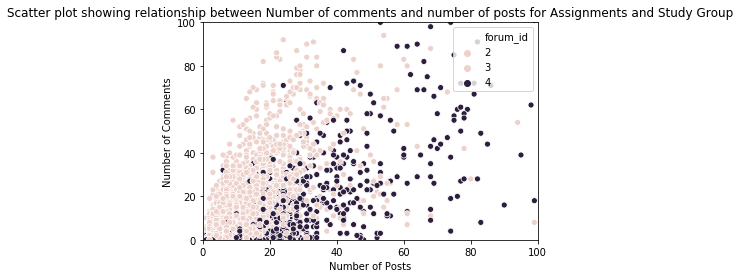

In [14]:
sns.scatterplot(data=fig4_dat, x='num_posts', y='num_comments', hue='forum_id')

#setting limits for x and y axis

plt.xlim(0,100)
plt.ylim(0,100)

#setting labels and the title
plt.xlabel("Number of Posts")
plt.ylabel("Number of Comments")
plt.title("Scatter plot showing relationship between Number of comments and number of posts for Assignments and Study Group");


In [16]:
#figure 4
df = pd.merge( tmp, course_data, on = 'course_id')
df.head(2)

,course_id,thread_id,is_post,count,num_posts,num_comments,name,weeks,hours,start_date,end_date,type,language,num_threads,mandatory_posts,num_users
0,analysenumerique-001,2,True,9,9,2,Analyse Numérique pour Ingénieurs,9,5,2/18/2013,NaN,Q,FR,119,NaN,103
1,analysenumerique-001,3,True,16,16,3,Analyse Numérique pour Ingénieurs,9,5,2/18/2013,NaN,Q,FR,119,NaN,103


Text(0, 0.5, 'number of threads')

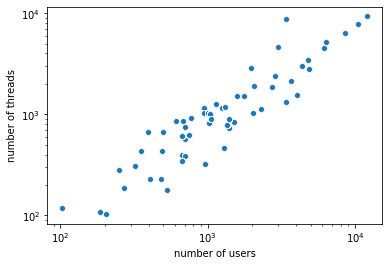

In [17]:
#generating plot
sns.scatterplot(x = df.num_users, y = df.num_threads)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("number of users")
plt.ylabel('number of threads')